In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from IPython.display import display, Markdown

# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# Import dataset and utilities
from dataset_utils import ECFPDataset
from downstream import run_downstream_task
from transforms import BlockRadiusLinearMixing
from pairwise_distances import (
    analyze_distance_preservation,
    compare_sparsity,
    compute_sparsity_metrics
)
from plots import plot_value_distributions
from run_experiment import run_experiment, run_multiradius_experiment

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
all_results = {}
print('✓ Setup complete!')

c:\Users\alber\venvs\ecfp_transformation\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✓ Setup complete!


### Binary ECFP Baseline

In [ ]:
print('='*70)
print('BINARY ECFP BASELINES')
print('='*70)

datasets = ['esol', 'lipo', 'bace']


for dataset in datasets:
    experiment_name = f'{dataset}_Binary_Baseline'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        transform_obj=None,
        analyze_distances=False
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

BINARY ECFP BASELINES

[esol_Binary_Baseline] ESOL - Binary ECFP
  RMSE: Val=1.1067, Test=1.1008

[lipo_Binary_Baseline] LIPO - Binary ECFP
  RMSE: Val=0.8105, Test=0.8257

[bace_Binary_Baseline] BACE - Binary ECFP
  ROC-AUC: Val=0.9073, Test=0.8672


### Count ECFP Baseline

In [3]:
print('='*70)
print('COUNT ECFP BASELINES')
print('='*70)

for dataset in datasets:
    experiment_name = f'{dataset}_Count_Baseline'
    result, distances = run_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        transform_obj=None,
        analyze_distances=False
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

COUNT ECFP BASELINES

[esol_Count_Baseline] ESOL - Count ECFP
  RMSE: Val=0.6703, Test=0.7606

[lipo_Count_Baseline] LIPO - Count ECFP
  RMSE: Val=0.7517, Test=0.7302

[bace_Count_Baseline] BACE - Count ECFP
  ROC-AUC: Val=0.9080, Test=0.8545


### Multi Radius Baselines

In [4]:
print('='*70)
print('MULTI-RADIUS BASELINES (No Transformation)')
print('='*70)


for dataset in datasets:
    # Binary multi-radius
    experiment_name=f'{dataset}_Binary_MultiRadius_Baseline'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        nonlinearity=None,
        normalize = False,
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count multi-radius
    experiment_name=f'{dataset}_Count_MultiRadius_Baseline'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        nonlinearity=None,
        normalize = False,
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }


MULTI-RADIUS BASELINES (No Transformation)

[esol_Binary_MultiRadius_Baseline] ESOL - Multi-Radius Binary
  RMSE: Val=1.1254, Test=1.0552

[lipo_Binary_MultiRadius_Baseline] LIPO - Multi-Radius Binary
  RMSE: Val=0.7538, Test=0.7641

[bace_Binary_MultiRadius_Baseline] BACE - Multi-Radius Binary
  ROC-AUC: Val=0.9116, Test=0.8779

[esol_Count_MultiRadius_Baseline] ESOL - Multi-Radius Count
  RMSE: Val=0.7046, Test=0.7526

[lipo_Count_MultiRadius_Baseline] LIPO - Multi-Radius Count
  RMSE: Val=0.6926, Test=0.6762

[bace_Count_MultiRadius_Baseline] BACE - Multi-Radius Count
  ROC-AUC: Val=0.9077, Test=0.8772


### Block Mixing - no activation

In [5]:
print('='*70)
print('BLOCK MIXING - IDENTITY (No Activation)')
print('='*70)

for dataset in datasets:
    # Binary multi-radius
    experiment_name=f'{dataset}_Binary_MultiRadius_NoActivation'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        nonlinearity=None
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count multi-radius
    experiment_name=f'{dataset}_Count_MultiRadius_NoActivation'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        nonlinearity=None
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

BLOCK MIXING - IDENTITY (No Activation)

[esol_Binary_MultiRadius_NoActivation] ESOL - Multi-Radius Binary
  RMSE: Val=1.0870, Test=1.0684

[lipo_Binary_MultiRadius_NoActivation] LIPO - Multi-Radius Binary
  RMSE: Val=0.7510, Test=0.7545

[bace_Binary_MultiRadius_NoActivation] BACE - Multi-Radius Binary
  ROC-AUC: Val=0.9114, Test=0.8774

[esol_Count_MultiRadius_NoActivation] ESOL - Multi-Radius Count
  RMSE: Val=0.7051, Test=0.7776

[lipo_Count_MultiRadius_NoActivation] LIPO - Multi-Radius Count
  RMSE: Val=0.7049, Test=0.6958

[bace_Count_MultiRadius_NoActivation] BACE - Multi-Radius Count
  ROC-AUC: Val=0.9075, Test=0.8674


### Block Mixing - Relu activation

In [6]:
print('='*70)
print('BLOCK MIXING - IDENTITY (No Activation)')
print('='*70)

for dataset in datasets:
    # Binary multi-radius
    experiment_name=f'{dataset}_Binary_MultiRadius_NoActivation'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        nonlinearity=None
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count multi-radius
    experiment_name=f'{dataset}_Count_MultiRadius_NoActivation'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        nonlinearity=None
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

BLOCK MIXING - IDENTITY (No Activation)

[esol_Binary_MultiRadius_NoActivation] ESOL - Multi-Radius Binary
  RMSE: Val=1.1643, Test=1.1011

[lipo_Binary_MultiRadius_NoActivation] LIPO - Multi-Radius Binary
  RMSE: Val=0.7450, Test=0.7548

[bace_Binary_MultiRadius_NoActivation] BACE - Multi-Radius Binary
  ROC-AUC: Val=0.9127, Test=0.8771

[esol_Count_MultiRadius_NoActivation] ESOL - Multi-Radius Count
  RMSE: Val=0.7209, Test=0.7343

[lipo_Count_MultiRadius_NoActivation] LIPO - Multi-Radius Count
  RMSE: Val=0.6942, Test=0.6889

[bace_Count_MultiRadius_NoActivation] BACE - Multi-Radius Count
  ROC-AUC: Val=0.9071, Test=0.8803


In [7]:
print('='*70)
print('BLOCK MIXING - RELU ACTIVATION')
print('='*70)

for dataset in datasets:
    # Binary multi-radius with ReLU activation
    experiment_name=f'{dataset}_Binary_BlockMixing_ReLU'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        nonlinearity='relu'
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count multi-radius with relu
    experiment_name=f'{dataset}_Count_BlockMixing_ReLU'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        nonlinearity='relu'
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

BLOCK MIXING - RELU ACTIVATION

[esol_Binary_BlockMixing_ReLU] ESOL - Multi-Radius Binary
  RMSE: Val=0.9793, Test=1.0137
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 0.9715 (p=0.00e+00)
  -> Excellent preservation!

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: 0.9562 (p=0.00e+00)
  -> Excellent preservation!

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: -0.0434 (p=3.90e-20)
  -> Poor preservation

Analyzing cosine distance preservation...
  Computing cosine distances on original datase

### Block Mixing - Tanh activation

In [8]:
print('='*70)
print('BLOCK MIXING - TANH ACTIVATION')
print('='*70)

for dataset in datasets:
    # Binary multi-radius with ReLU activation
    experiment_name=f'{dataset}_Binary_BlockMixing_tanh'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=False,
        nonlinearity='tanh'
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }
    
for dataset in datasets:
    # Count multi-radius with relu
    experiment_name=f'{dataset}_Count_BlockMixing_tanh'
    result, distances = run_multiradius_experiment(
        experiment_name=experiment_name,
        dataset_name=dataset,
        use_count=True,
        nonlinearity='tanh'
    )
    all_results[experiment_name] = {
        'downstream': result,
        'distances': distances
    }

BLOCK MIXING - TANH ACTIVATION

[esol_Binary_BlockMixing_tanh] ESOL - Multi-Radius Binary
  RMSE: Val=0.9631, Test=1.0485
Using 300 randomly sampled molecules (same samples for both datasets)

Analyzing tanimoto distance preservation...
  Computing tanimoto distances on original dataset...
  Computing tanimoto distances on transformed dataset...
  Spearman correlation: 0.9925 (p=0.00e+00)
  -> Excellent preservation!

Analyzing continuous_tanimoto distance preservation...
  Computing continuous_tanimoto distances on original dataset...
  Computing continuous_tanimoto distances on transformed dataset...
  Spearman correlation: -0.0084 (p=7.52e-02)
  -> Poor preservation

Analyzing euclidean distance preservation...
  Computing euclidean distances on original dataset...
  Computing euclidean distances on transformed dataset...
  Spearman correlation: 0.0914 (p=7.81e-84)
  -> Poor preservation

Analyzing cosine distance preservation...
  Computing cosine distances on original dataset...
 

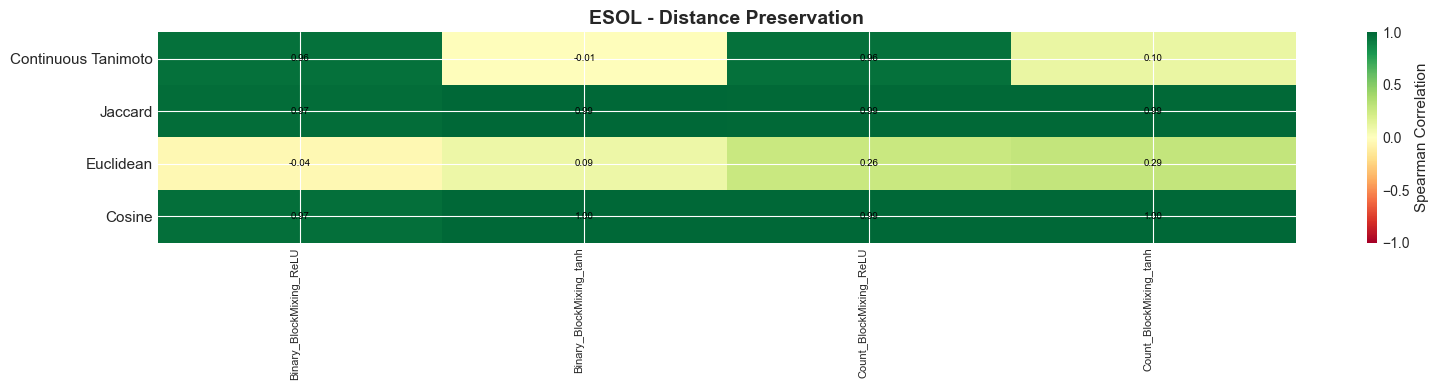


ESOL - Best Distance Preservation:
  Experiment: Count_BlockMixing_ReLU
  Average: 0.8002
  Tanimoto: 0.9864
  Euclidean: 0.2620
  Cosine: 0.9925



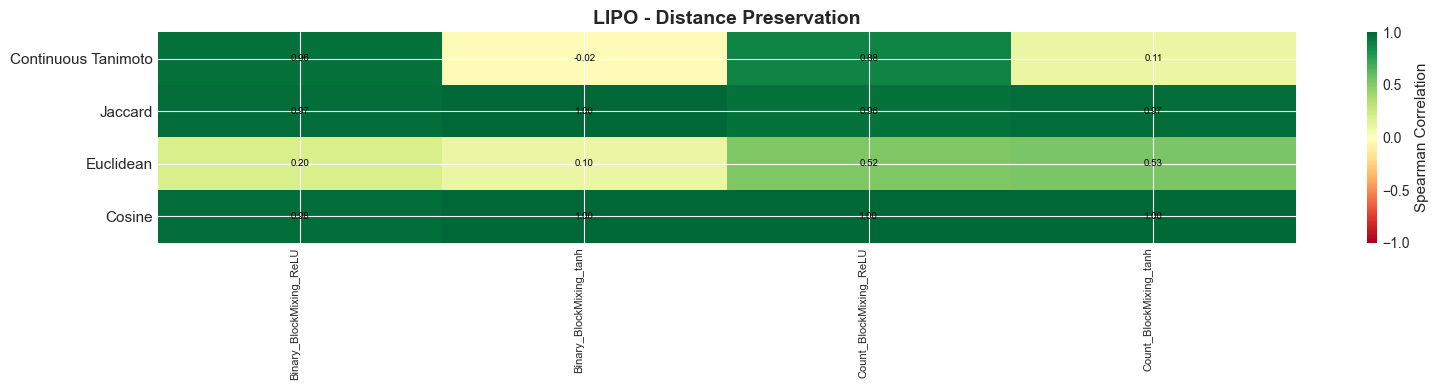


LIPO - Best Distance Preservation:
  Experiment: Count_BlockMixing_ReLU
  Average: 0.8368
  Tanimoto: 0.9574
  Euclidean: 0.5181
  Cosine: 0.9965



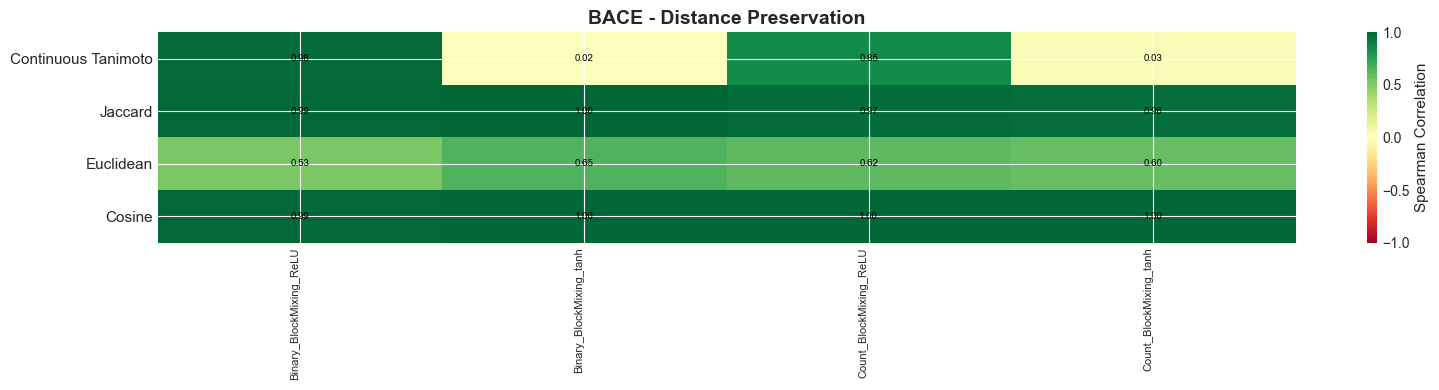


BACE - Best Distance Preservation:
  Experiment: Binary_BlockMixing_ReLU
  Average: 0.8721
  Tanimoto: 0.9868
  Euclidean: 0.5309
  Cosine: 0.9882



In [9]:
for dataset_name in ['esol', 'lipo', 'bace']:
    # Filter results with distance metrics
    dataset_results = {k: v for k, v in all_results.items() 
                      if k.startswith(dataset_name) and v['distances'] is not None}
    
    if len(dataset_results) == 0:
        continue
    
    # Extract correlations
    experiments = []
    tanimoto_corr = []
    continuous_tanimoto_corr = []
    euclidean_corr = []
    cosine_corr = []
    
    for key, result in sorted(dataset_results.items()):
        experiments.append(key.replace(f'{dataset_name}_', ''))
        continuous_tanimoto_corr.append(result['distances']['continuous_tanimoto']['correlation'])
        tanimoto_corr.append(result['distances']['tanimoto']['correlation'])
        euclidean_corr.append(result['distances']['euclidean']['correlation'])
        cosine_corr.append(result['distances']['cosine']['correlation'])
    
    # Create heatmap
    corr_matrix = np.array([continuous_tanimoto_corr, tanimoto_corr, euclidean_corr, cosine_corr])
    
    fig, ax = plt.subplots(figsize=(16, 4))
    
    im = ax.imshow(corr_matrix, cmap='RdYlGn', aspect='auto', vmin=-1, vmax=1)
    
    ax.set_xticks(np.arange(len(experiments)))
    ax.set_yticks(np.arange(4))
    ax.set_xticklabels(experiments, rotation=90, ha='right', fontsize=8)
    ax.set_yticklabels(['Continuous Tanimoto', 'Jaccard', 'Euclidean', 'Cosine'], fontsize=11)
    
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Spearman Correlation', fontsize=11)
    
    # Add text annotations
    for i in range(4):
        for j in range(len(experiments)):
            text = ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                          ha='center', va='center', color='black', fontsize=7)
    
    ax.set_title(f'{dataset_name.upper()} - Distance Preservation', 
                fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print best preservation
    avg_corr = corr_matrix.mean(axis=0)
    best_idx = np.argmax(avg_corr)
    print(f'\n{dataset_name.upper()} - Best Distance Preservation:')
    print(f'  Experiment: {experiments[best_idx]}')
    print(f'  Average: {avg_corr[best_idx]:.4f}')
    print(f'  Tanimoto: {tanimoto_corr[best_idx]:.4f}')
    print(f'  Euclidean: {euclidean_corr[best_idx]:.4f}')
    print(f'  Cosine: {cosine_corr[best_idx]:.4f}\n')

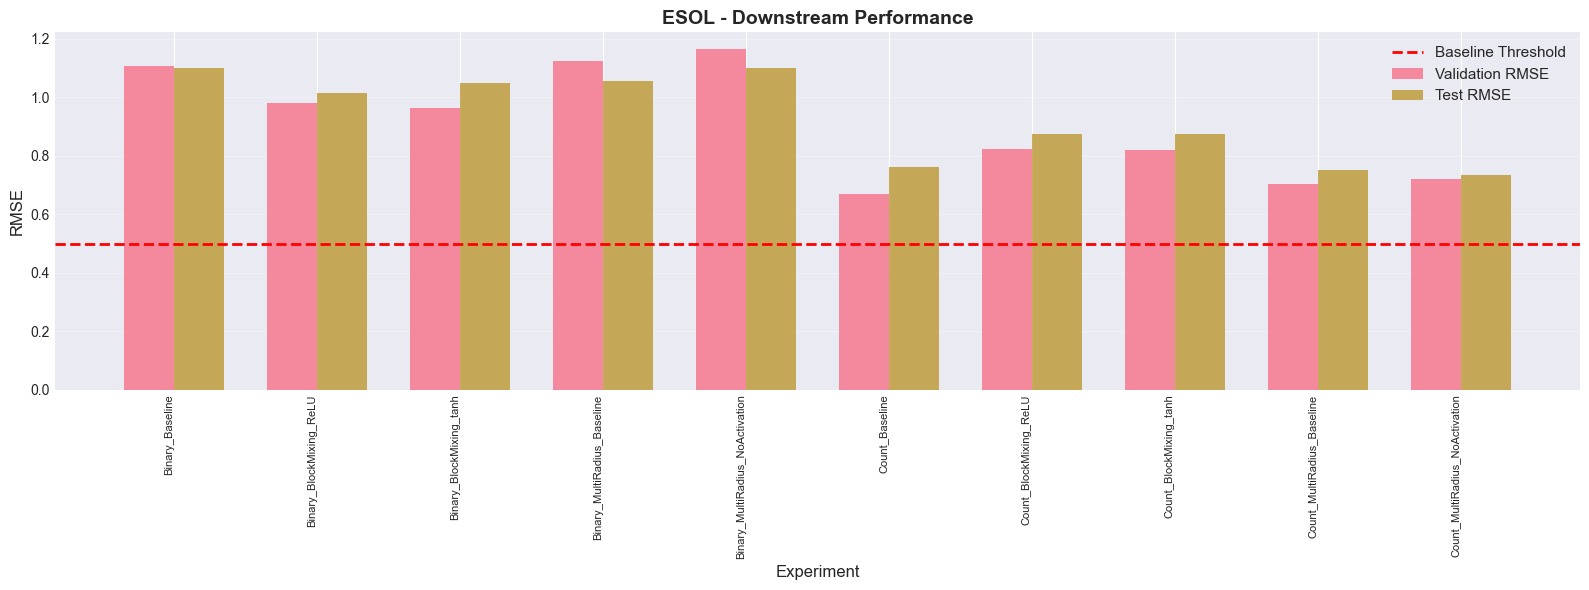


ESOL - Best RMSE:
  Experiment: Count_Baseline
  Val: 0.6703
  Test: 0.7606



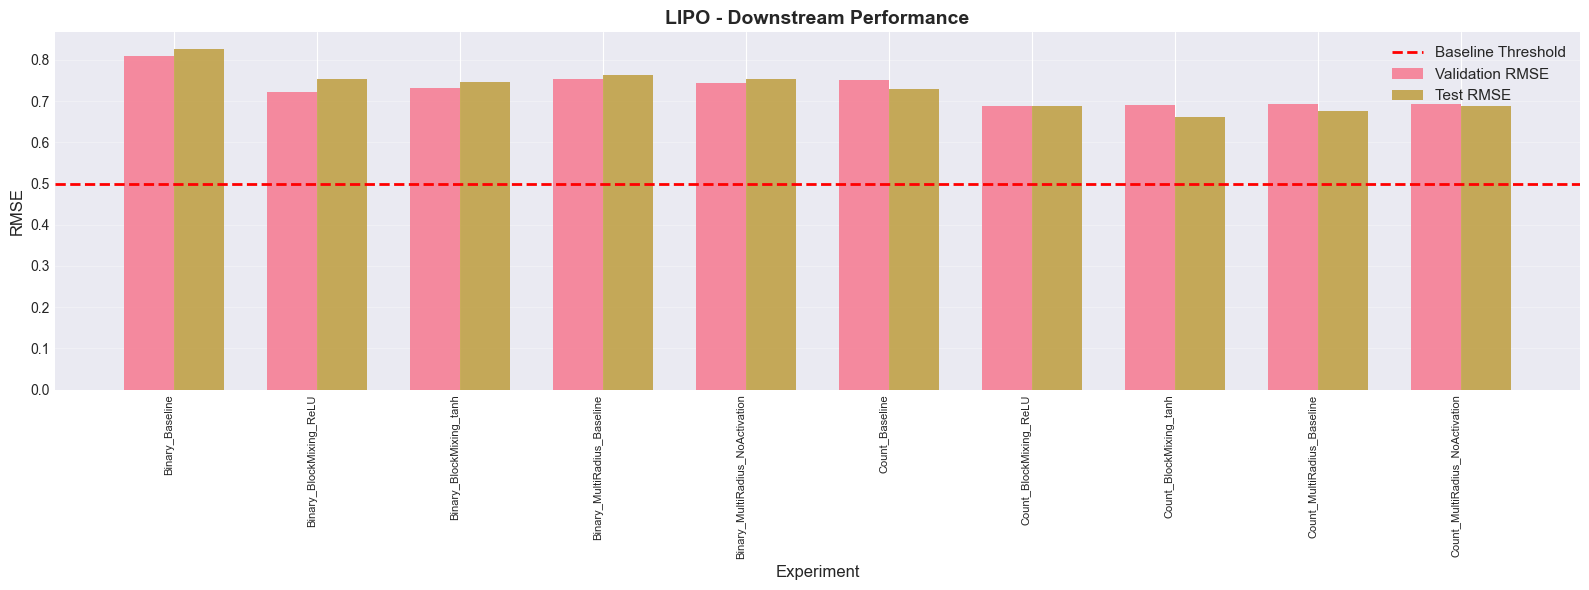


LIPO - Best RMSE:
  Experiment: Count_BlockMixing_ReLU
  Val: 0.6877
  Test: 0.6890



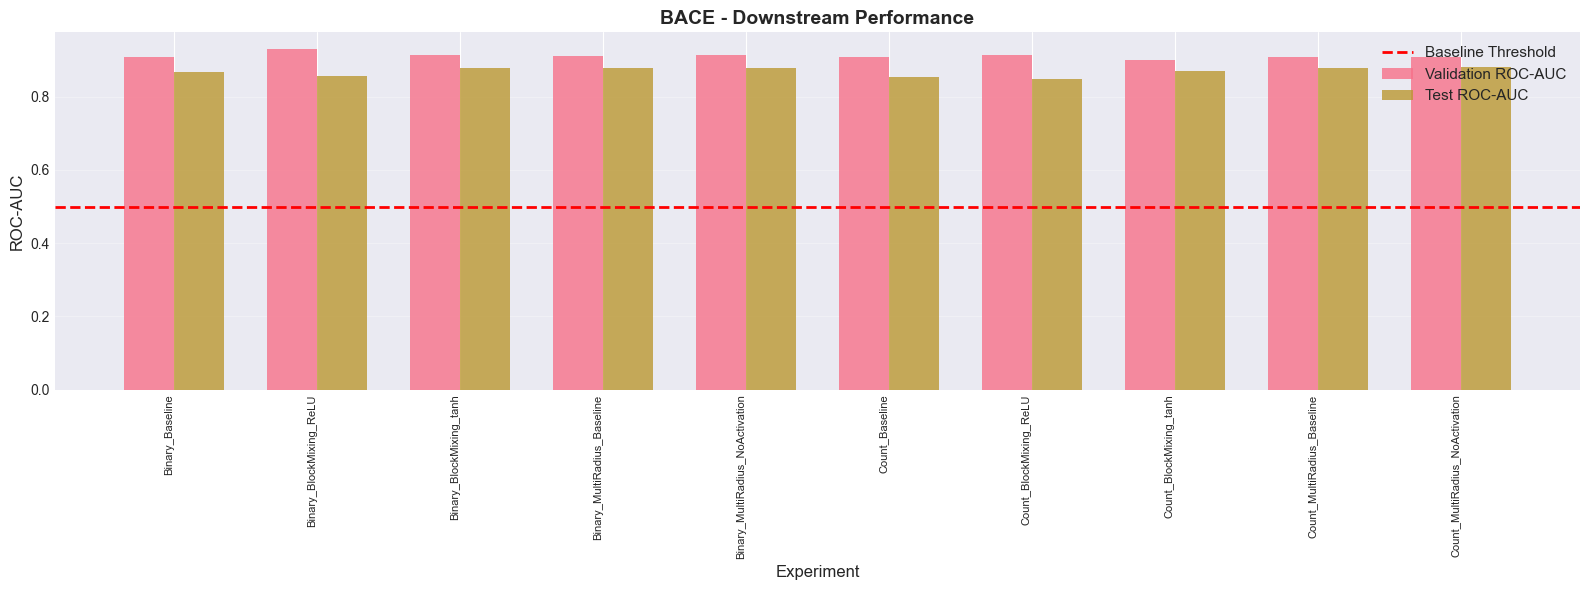


BACE - Best ROC-AUC:
  Experiment: Binary_BlockMixing_ReLU
  Val: 0.9292
  Test: 0.8565



In [ ]:
for dataset_name in ['esol', 'lipo', 'bace']:
    task_type = 'classification' if dataset_name == 'bace' else 'regression'
    metric_name = 'ROC-AUC' if task_type == 'classification' else 'RMSE'
    
    # Filter results for this dataset
    dataset_results = {k: v for k, v in all_results.items() if k.startswith(dataset_name)}
    
    # Extract data
    experiments = []
    val_scores = []
    test_scores = []
    
    for key, result in sorted(dataset_results.items()):
        experiments.append(key.replace(f'{dataset_name}_', ''))
        val_scores.append(result['downstream']['val'])
        test_scores.append(result['downstream']['test'])
    
    # Create plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    x = np.arange(len(experiments))
    width = 0.35
    
    #ax.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Binary ECFP Baseline') 

    ax.bar(x - width/2, val_scores, width, label=f'Validation {metric_name}', alpha=0.8)
    ax.bar(x + width/2, test_scores, width, label=f'Test {metric_name}', alpha=0.8)
    
    ax.set_xlabel('Experiment', fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)
    ax.set_title(f'{dataset_name.upper()} - Downstream Performance', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(experiments, rotation=90, ha='right', fontsize=8)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print best result
    best_idx = np.argmin(val_scores) if task_type == 'regression' else np.argmax(val_scores)
    print(f'\n{dataset_name.upper()} - Best {metric_name}:')
    print(f'  Experiment: {experiments[best_idx]}')
    print(f'  Val: {val_scores[best_idx]:.4f}')
    print(f'  Test: {test_scores[best_idx]:.4f}\n')